In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pymc3 as pm 
import os 

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [3]:
ea = np.random.uniform(100, 500, 10000)
d0 = np.random.uniform(0, 10000, 10000)
a = np.random.uniform(1, 250, 10000)
age = np.random.uniform(0, 4600, 10000)
phi = np.random.dirichlet((1,1,1), 10000)

In [4]:
ea_grid = np.linspace(80, 600, 500)
d0_grid = np.linspace(0, 11000, 500)
a_grid = np.linspace(0, 250, 500)
age_grid = np.linspace(0, 5000, 500)
phi_grid = np.linspace(0, 1, 500)

In [5]:
k = 20
m = 10
xx = np.ones(k)
yy = np.ones(m)
comp = np.random.dirichlet((80,20,10), 1000)
dom = np.random.dirichlet((100,50,20), 100)
dom_grid = np.linspace(0,1, 100)
y_comp1 = kde_scipy(comp[:,0], 
                    dom_grid, 
                    bandwidth = 0.1)
y_comp2 = kde_scipy(comp[:,1], 
                    dom_grid, 
                    bandwidth = 0.1)
y_comp3 = kde_scipy(comp[:,2], 
                    dom_grid, 
                    bandwidth = 0.1)


y_dom1 = kde_scipy(dom[:,0], 
                    dom_grid, 
                    bandwidth = 0.1)
y_dom2 = kde_scipy(dom[:,1], 
                    dom_grid, 
                    bandwidth = 0.1)
y_dom3 = kde_scipy(dom[:,2], 
                    dom_grid, 
                    bandwidth = 0.1)

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


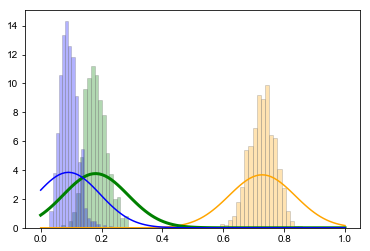

In [6]:
k = 20
m = 20
xx = np.ones(k)
yy = np.ones(m)

plt.plot(dom_grid, y_comp1, 
        color = 'orange')
plt.plot(dom_grid, y_comp2, 
        color= 'green', lw = 3)
plt.plot(dom_grid, y_comp3, 
        color = 'blue')
plt.hist(comp[:,0], 
         normed = True, 
        color = 'orange', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');
plt.hist(comp[:,1],
         normed = True, 
        color = 'green', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');
plt.hist(comp[:,2],
         normed = True, 
        color = 'blue', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');

In [7]:
from scipy.stats import halfnorm
age_mean = np.random.uniform(0, 4600, 10000)
age_sd = halfnorm.rvs(age_mean/10,size = 10000)
age_grid = np.linspace(0, 5000, 100)
age_sd_kde = kde_scipy(age_sd, age_grid, bandwidth = 200)
age_mean_kde = kde_scipy(age_mean, age_grid, bandwidth = 500)
age_norm = np.zeros(10000)

for i in range(10000):
    age_norm[i] = np.random.normal(age[i], age_sd[i])
    
age_norm


ea_mean = np.random.uniform(80, 500, 10000)
ea_sd = halfnorm.rvs(ea_mean/10, size = 10000)
ea_mean_kde = kde_scipy(ea_mean, ea_grid, bandwidth = 20)
ea_sd_kde = kde_scipy(ea_sd, ea_grid, bandwidth = 20)

ea_norm = np.zeros(10000)
for i in range(10000):
    ea_norm[i] = np.random.normal(ea_mean[i], ea_sd[i])

    
d0_mean = np.random.uniform(0, 10000, 10000)
d0_sd = halfnorm.rvs(d0_mean/10, size = 10000)
d0_mean_kde = kde_scipy(d0_mean, d0_grid, bandwidth = 500)
d0_sd_kde = kde_scipy(d0_sd, d0_grid, bandwidth = 500)

d0_norm = np.zeros(10000)
for i in range(10000):
    d0_norm[i] = np.random.normal(d0_mean[i], d0_sd[i])
    
    
ea_norm_kde = kde_scipy(ea_norm, ea_grid, bandwidth = 20)
d0_norm_kde = kde_scipy(d0_norm, d0_grid, bandwidth = 500)
age_norm_kde = kde_scipy(age_norm, age_grid, bandwidth = 500)

a = np.random.uniform(1, 250, 10000)

a_kde = kde_scipy(a, a_grid, bandwidth = 10)
dom_grid = np.linspace(0, 1, 100)

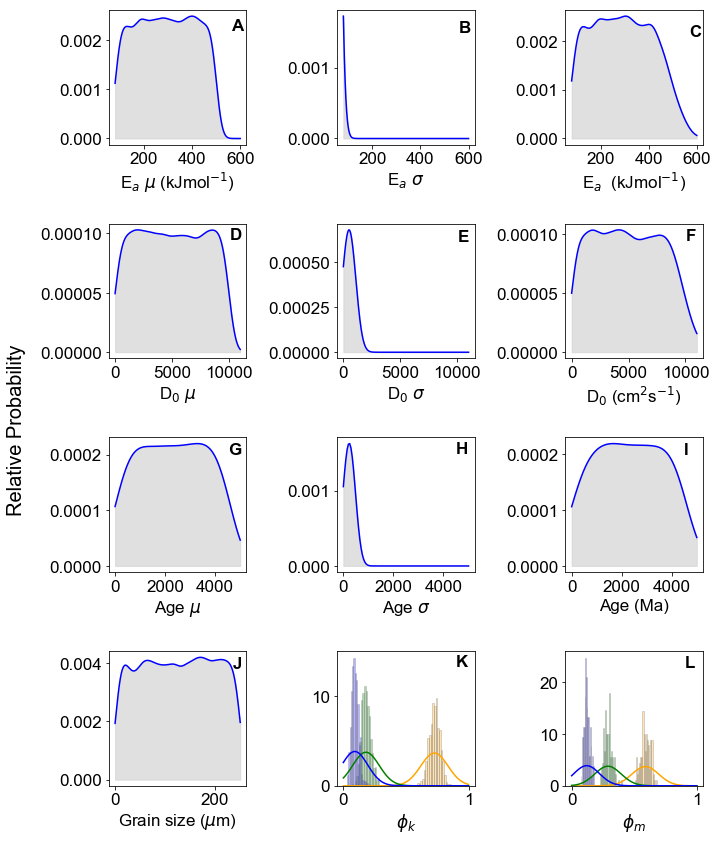

In [19]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 17}

plt.rc('font', **font)

fig, ax = plt.subplots(4,3,figsize = (10,12))

ax[0,0].plot(ea_grid, ea_mean_kde, 
        color = 'blue')


ax[0,0].fill_between(ea_grid, ea_mean_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)




ax[0,1].plot(ea_grid, ea_sd_kde, 
        color = 'blue')


ax[0,1].fill_between(ea_grid, ea_sd_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)

ax[0,2].plot(ea_grid, ea_norm_kde, 
        color = 'blue')


ax[0,2].fill_between(ea_grid, ea_norm_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)


ax[1,0].plot(d0_grid, d0_mean_kde, 
        color = 'blue')


ax[1,0].fill_between(d0_grid, d0_mean_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)




ax[1,1].plot(d0_grid, d0_sd_kde, 
        color = 'blue')


ax[1,1].fill_between(d0_grid, d0_sd_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)

ax[1,2].plot(d0_grid, d0_norm_kde, 
        color = 'blue')


ax[1,2].fill_between(d0_grid, d0_norm_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)




ax[2,0].plot(age_grid, age_mean_kde, 
        color = 'blue')
ax[2,1].plot(age_grid, age_sd_kde, 
        color = 'blue')
ax[2,2].plot(age_grid, age_norm_kde, 
        color = 'blue')


ax[2,0].fill_between(age_grid, age_mean_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)

ax[2,1].fill_between(age_grid, age_sd_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)


ax[2,2].fill_between(age_grid, age_norm_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)

ax[3,0].plot(a_grid, a_kde, 
            color = 'blue')
ax[3,0].fill_between(a_grid, a_kde,
                    color = 'lightgrey', 
                    alpha = 0.7)


ax[3,1].plot(dom_grid, y_comp1, 
        color = 'orange')
ax[3,1].plot(dom_grid, y_comp2, 
        color= 'green')
ax[3,1].plot(dom_grid, y_comp3, 
        color = 'blue')
ax[3,1].hist(comp[:,0], 
         normed = True, 
        color = 'orange', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');
ax[3,1].hist(comp[:,1],
       normed = True, 
        color = 'green', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');
ax[3,1].hist(comp[:,2],
         normed = True, 
        color = 'blue', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');

ax[3,2].plot(dom_grid, y_dom1, 
        color = 'orange')
ax[3,2].plot(dom_grid, y_dom2, 
        color= 'green')
ax[3,2].plot(dom_grid, y_dom3, 
      color = 'blue')
ax[3,2].hist(dom[:,0], 
         normed = True, 
        color = 'orange', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');
ax[3,2].hist(dom[:,1],
       normed = True, 
        color = 'green', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');
ax[3,2].hist(dom[:,2],
         normed = True, 
        color = 'blue', 
        alpha = 0.3, 
        bins = 20, 
        edgecolor= 'grey');

ax[0,0].set_xlabel('E$_{a}$ $\mu$ (kJmol$^{-1}$)')
ax[0,1].set_xlabel('E$_{a}$ $\sigma$')
ax[0,2].set_xlabel('E$_{a}$  (kJmol$^{-1}$)')

ax[1,0].set_xlabel('D$_{0}$ $\mu$')
ax[1,1].set_xlabel('D$_{0}$ $\sigma$')
ax[1,2].set_xlabel('D$_{0}$ (cm$^{2}$s$^{-1}$)')

ax[2,0].set_xlabel('Age $\mu$')
ax[2,1].set_xlabel('Age $\sigma$')
ax[2,2].set_xlabel('Age (Ma)' )

ax[3,0].set_xlabel('Grain size ($\mu$m)')
ax[3,1].set_xlabel('$\phi_{k}$')
ax[3,2].set_xlabel('$\phi_{m}$')

ax[2,0].set_ylabel('Relative Probability', fontsize = 20)
plt.tight_layout()

s1 = 'A'; s2= 'B'; s3 = 'C'; s4 = 'D'; 
s5 = 'E'; s6 = 'F'; s7 = 'G'; s8 = 'H'; 
s9 = 'I'; s10 = "J"; s11= "K"; s12 = "L"




ax[0,0].locator_params(axis='x', nbins=3)
ax[0,1].locator_params(axis='x', nbins=3)
ax[0,2].locator_params(axis='x', nbins=3)

ax[1,0].locator_params(axis='x', nbins=3)
ax[1,1].locator_params(axis='x', nbins=3)
ax[1,2].locator_params(axis='x', nbins=3)

ax[2,0].locator_params(axis='x', nbins=5)
ax[2,1].locator_params(axis='x', nbins=4)
ax[2,2].locator_params(axis='x', nbins=4)

ax[0,0].text(565, 0.0022, s1, fontsize = 17, 
            fontweight = 'bold')
ax[0,1].text(560, 0.0015, s2, fontsize = 17, 
            fontweight = 'bold')
ax[0,2].text(567, 0.0021, s3, fontsize = 17, 
            fontweight = 'bold')

ax[1,0].text( 10050, 0.000095, s4, fontsize = 17, 
            fontweight = 'bold')
ax[1,1].text( 10050, 0.00062, s5, fontsize = 17, 
            fontweight = 'bold')
ax[1,2].text( 10050, 0.000095, s6, fontsize = 17, 
            fontweight = 'bold')

ax[2,0].text(4500,0.0002, s7, fontsize = 17, 
            fontweight = 'bold')
ax[2,1].text( 4500, 0.0015, s8, fontsize = 17, 
          fontweight = 'bold')
ax[2,2].text( 4500, 0.0002, s9, fontsize = 17, 
            fontweight = 'bold')

ax[3,0].text(235,0.0038,  s10, fontsize = 17, 
            fontweight = 'bold')
ax[3,1].text(0.9, 13.4, s11, fontsize = 17, 
            fontweight = 'bold')
ax[3,2].text(0.9, 23, s12, fontsize = 17, 
            fontweight = 'bold')

ax[2,0].yaxis.set_label_coords(-0.6,1.06)
plt.savefig('/Users/jackcarter/Desktop/chp3_figs/bm_priors_chp3.pdf')

In [9]:
from scipy.stats import halfnorm
age_sd = halfnorm.rvs(age/10,size = 10000)
x5_grid = np.linspace(0, 500, 100)
y5 = kde_scipy(age_sd, x5_grid, bandwidth = 200)

age_norm = np.zeros(10000)
for i in range(10000):
    age_norm[i] = np.random.normal(age[i], age_sd[i])
    

In [10]:
y6 = kde_scipy(age_norm, x4_grid, bandwidth = 200)

NameError: name 'x4_grid' is not defined

In [ ]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
sns.set_style('ticks')
fig, ax = plt.subplots(2,2, 
                      figsize = (7, 5))

ax[0,0].plot(x4_grid, y4, 
          color = 'b')
ax[0,0].hist(age, normed = True, 
          edgecolor = 'grey', 
          facecolor = 'skyblue');
ax[0,0].set_xlabel('Age$_{mu}$ (Ma)')


ax[0,1].plot(x5_grid, y5, 
          color = 'b')
ax[0,1].hist(age_sd, normed = True, 
          edgecolor = 'grey', 
          facecolor = 'skyblue');
ax[0,1].set_xlabel('Age$_{sd}$ (Ma)')
ax[0,1].set_xlim(0,500)

ax[1,1].hist(age_norm, normed = True, 
          edgecolor = 'grey', 
          facecolor = 'skyblue');
ax[1,1].plot(x4_grid, y6, 
          color = 'b')
ax[1,1].set_xlabel('Age (Ma)')

fig.delaxes(ax[1,0])

ax[0,0].set_ylabel('Relative Probability')
plt.tight_layout()
plt.savefig('/Users/jackcarter/Desktop/Thesis, Chp.3 Figures/age_prior.pdf')

In [ ]:
plt.hist(comp[2:,]);

In [ ]:
for i in range(k):
    xx1 = kde_scipy(comp[i,:], dom_grid)
    plt.plot(dom_grid, xx1)

In [ ]:
fig, ax = plt.subplots(1,4, 
                      figsize = (12, 3))

ax[0].plot(x1_grid, y1, 
          color = 'b')
ax[0].hist(ea, normed = True, 
          edgecolor = 'grey', 
          facecolor = 'skyblue');


ax[1].plot(x2_grid, y2, 
          color = 'b')
ax[1].hist(d0, normed = True, 
          edgecolor = 'grey', 
          facecolor = 'skyblue');


ax[2].plot(x3_grid, y3, 
          color = 'b')
ax[2].hist(a, normed = True, 
          edgecolor = 'grey', 
          facecolor = 'skyblue');


ax[3].plot(x4_grid, y4, 
          color = 'b')
ax[3].hist(age, normed = True, 
          edgecolor = 'grey', 
          facecolor = 'skyblue');

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])

ax[0].set_ylabel('Relative Probabiity')
ax[0].set_xlabel('Activation Energy (E$_a$)')
ax[1].set_xlabel('ln(Frequency Factor) (ln(D$_0$))')
ax[2].set_xlabel('Grain radii ($\mu$m)')
ax[3].set_xlabel('Age (Ma)')



ax[0].locator_params(axis='x', nbins=5)
ax[2].locator_params(axis='x', nbins=5)
ax[3].locator_params(axis='x', nbins=5)
plt.tight_layout()

In [ ]:
zz = np.random.gamma(1,2, 10000)
grid_ncomp = np.linspace(1, 60)
zz = np.random.gamma(1,2, 10000)
zz1 = kde_scipy(zz+1, grid_ncomp, bandwidth = 2)
zzz = np.random.gamma(2,4, 10000)
zzz1 = kde_scipy(zzz+1, grid_ncomp, bandwidth = 2)
zzzz = np.random.gamma(3,6, 10000)
zzzz1 = kde_scipy(zzzz+1, grid_ncomp, bandwidth = 2)


In [ ]:
fig = plt.figure(figsize = (4,4))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
sns.set_style('ticks')

plt.hist(zz + 1, normed = True, 
        facecolor = 'blue', 
        edgecolor = 'grey', 
        bins = 20, 
        alpha = 0.4);
plt.hist(zzz + 1, normed = True, 
        facecolor = 'orange', 
        edgecolor = 'grey', 
        bins = 20, 
        alpha = 0.4);
plt.hist(zzzz + 1, normed = True, 
        facecolor = 'green', 
        edgecolor = 'grey', 
        bins = 20, 
        alpha = 0.4);
plt.plot(grid_ncomp, zz1, 
        color = 'b', 
        lw = 2)

plt.plot(grid_ncomp, zzz1, 
        color = 'orange', 
        lw = 2)

plt.plot(grid_ncomp, zzzz1, 
        color = 'green', 
        lw = 2)


plt.ylabel('Relative Probability')
plt.xlabel('# of components')
plt.tight_layout()
plt.xlim(0, 50)
plt.tight_layout()
plt.savefig('/Users/jackcarter/Desktop/ncomp_prior.pdf')